In [136]:
#Import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


In [137]:
#read the data from file
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [138]:
leads.shape

(9240, 37)

In [139]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [140]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [141]:
#Check % of missing values in each column
leads.isnull().sum() * 100/9240

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### As given in problem statement the value 'Select' should be treated as nan. Converting the same in below step

In [142]:
leads = leads.replace('Select', np.nan)

In [143]:
#rechecking the null % values for each column
leads.isnull().sum() * 100/9240

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [144]:
#dropping the columsn having missing values more than 40%
leads.drop(["Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index","Asymmetrique Activity Index","Lead Profile","Lead Quality","How did you hear about X Education"],axis=1, inplace=True)

In [145]:
leads.shape

(9240, 30)

In [146]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

# Handling Missing value

In [147]:
#Checking country column
leads.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [148]:
#95% values in country are India. Replacing missing values with India.
leads.Country.fillna('India',inplace=True)

In [149]:
#Analysing Specilization column
leads.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [150]:
#Cannot drop column imputing with unknown for further anlysis
leads.Specialization.fillna('Unknown',inplace=True)

In [151]:
#Analyzing 'What is your current occupation' column
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [152]:
#85% values in column are Unemployed so replacing missing value with the same
leads['What is your current occupation'].fillna('Unemployed',inplace=True)

In [153]:
#analyzing 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [154]:
#over 99% are better career prospects.Replacing missingvalues with the same
leads['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [155]:
#Analyzing tags column
leads.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [156]:
#imputing missing values with 'Will revert after reading the email '
leads.Tags.fillna('Will revert after reading the email',inplace=True)

In [157]:
#Analyzing City column
leads.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [158]:
#Major chunck of records having city Mumbai. Replacing missing values with the same
leads.City.fillna('Mumbai',inplace=True)

In [159]:
leads.isnull().sum() * 100/9240

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [160]:
#other rows with missing value are below 1.5%. Dropping these rows will not have significant impact on further analysis
leads.dropna(inplace = True)

In [161]:
leads.shape

(9074, 30)

In [162]:
#Check if all missing values are handled
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [163]:
#Lead Number is unniques for lead and wont help in analysis. dropping it.
leads.drop(["Lead Number"],axis=1, inplace=True)

# EDA

# Univariate and Bivariate Analysis

In [164]:
#Target variable analysis 
#lead conversion ratio
lead_convert_ratio=sum(leads.Converted)/len(leads.Converted)
lead_convert_ratio*100

37.85541106458012

### 37.855 is conversion rate.

<AxesSubplot:ylabel='Converted'>

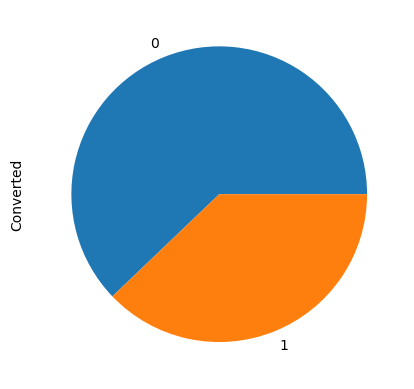

In [165]:
leads.Converted.value_counts().plot.pie()

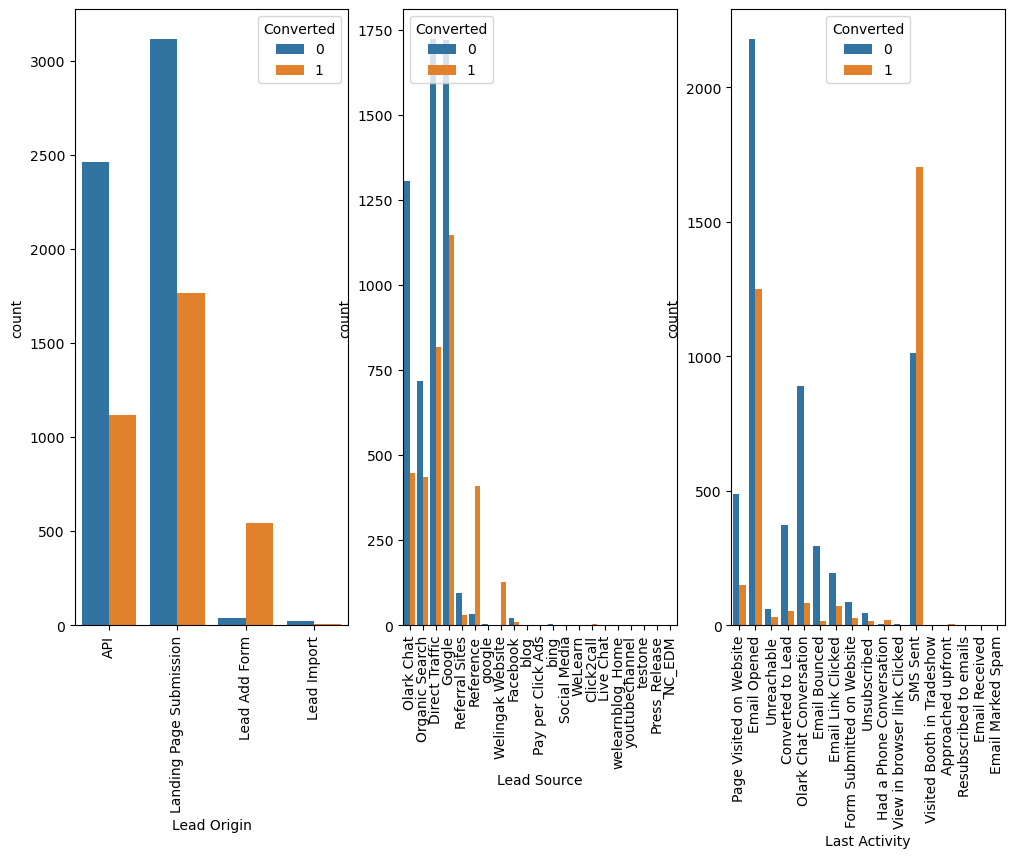

In [166]:
#variable analysis against target
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.xticks(rotation=90)
sns.countplot(x = 'Lead Origin', hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(x = 'Lead Source', hue='Converted',data = leads)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(x = 'Last Activity', hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.show()


1. Lead Origin -  Leads originated from API and LAnding submission page are high but coversion ratio is poor. Need to focus here for conversion rate.
   Between 30-40% getting converted for these 2 category. 
   Lead landing page has higherst conversion (ration >90%) but the count is substantialy low against overall count.
2. Lead Source - Olark chat, Direct traffic and Google are generating most leads.
   Refrence and Welingak wesite have highest conversion rate but not huge traffic from these 2.
3. Last Activity - Email and SMS are major activities done by visitors . VIsitor with SMS activity have high conversion ration      >50%   

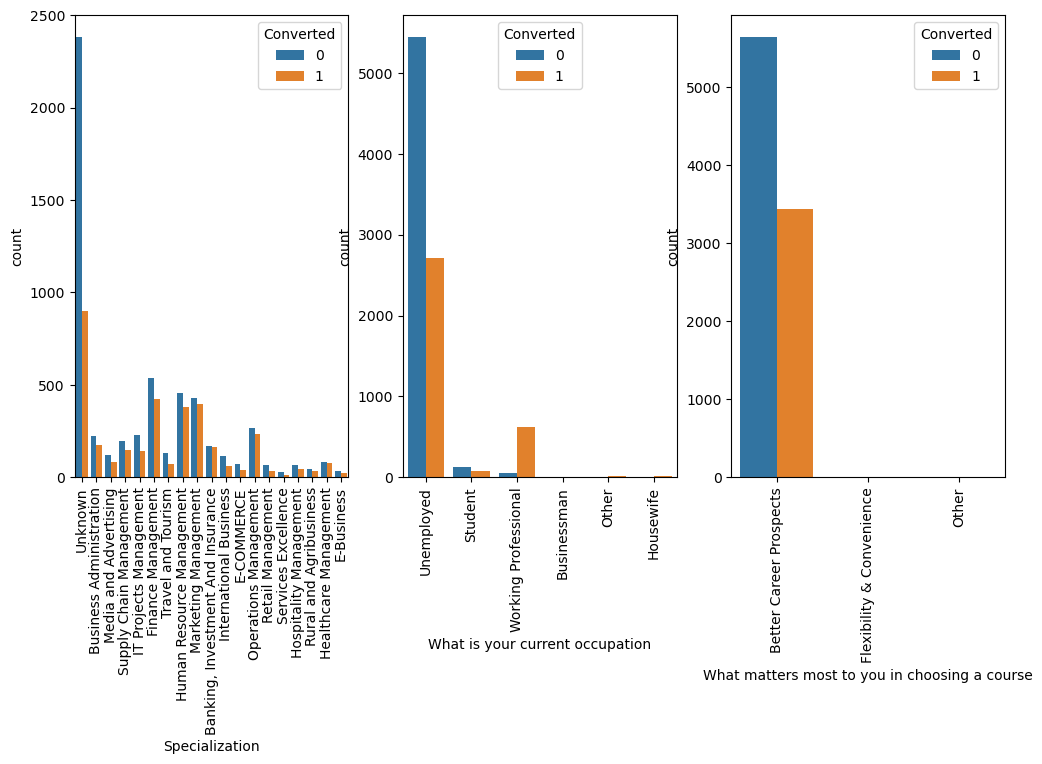

In [167]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
sns.countplot(x = 'Specialization',hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(x = 'What is your current occupation',hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(x = 'What matters most to you in choosing a course',hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.show()

1. Specialization- Finance management, human resouce mangement, marketing management, operations management , banking, investment and insurance specialized leads have high conversion ratio.
2. Current Occupation - Unemployed generate most lead but working professionals have high conversion ratio.
3. Matters most in choosing course- Batter career prospect have most leads genrated.

In [168]:
#As most leads in what matters most in choosing a course have no variation , it will add anything for coclusions . hence dropping column
leads.drop(["What matters most to you in choosing a course"],axis=1, inplace=True)

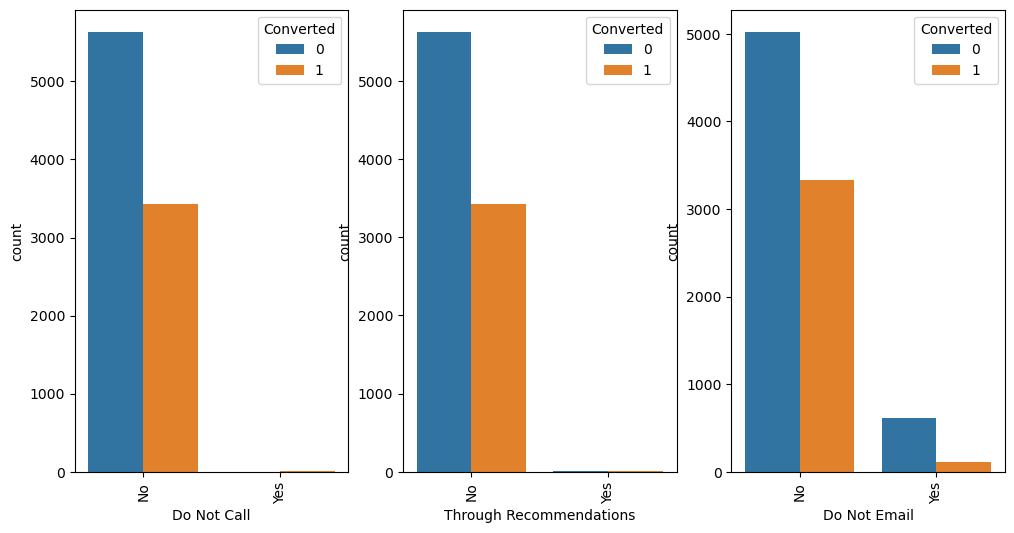

In [169]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
sns.countplot(x = 'Do Not Call', hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(x = 'Through Recommendations',hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(x = 'Do Not Email',hue='Converted' ,  data = leads )
plt.xticks(rotation=90)
plt.show()

Do not call, Through recommendation and do not email most choosen option is no and converstion rate is also similar.

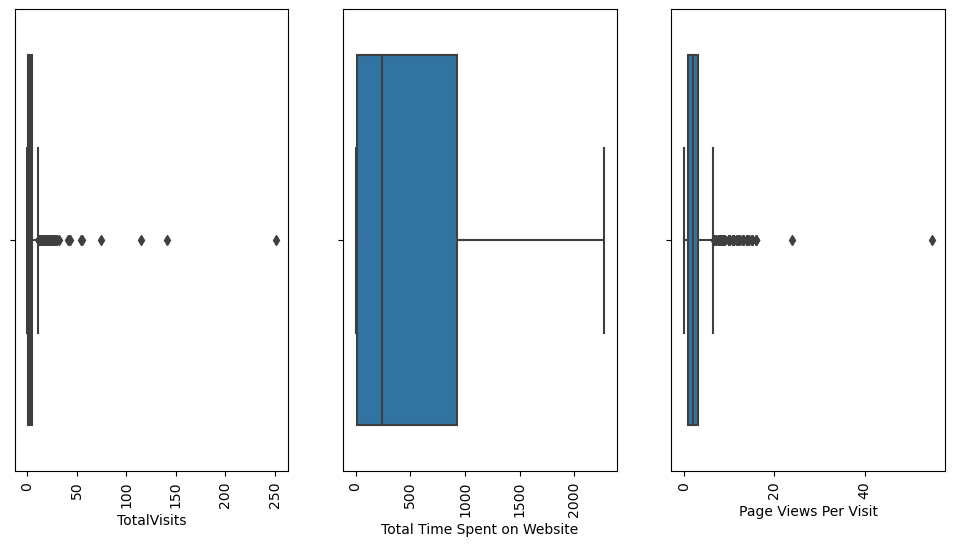

In [170]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
sns.boxplot('TotalVisits', data = leads)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot('Total Time Spent on Website', data = leads)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.boxplot('Page Views Per Visit' ,  data = leads )
plt.xticks(rotation=90)
plt.show()

Some outliers in total visits, could be gew of the customers visiting multiple times befir enrolling.
SOme outliers in page per visit also.
TOtal time spent on website looks good

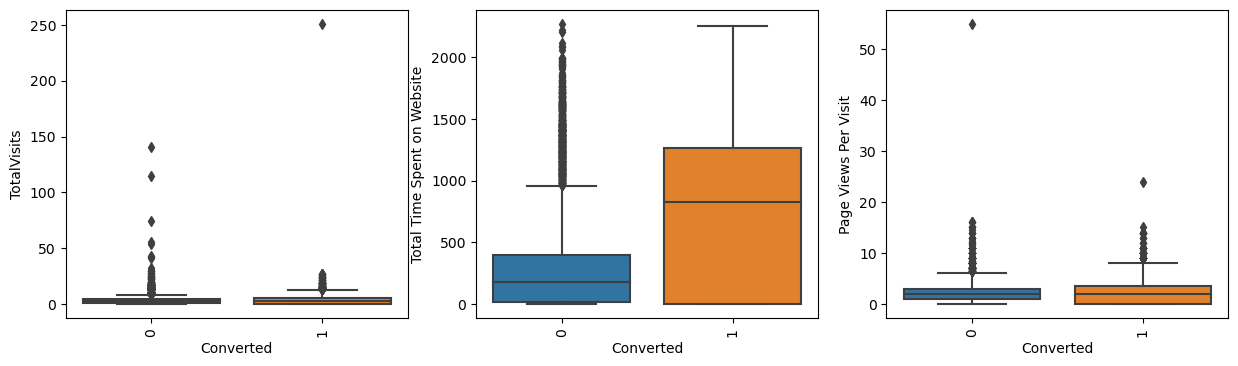

In [171]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.boxplot(y='TotalVisits', x='Converted',data = leads, orient='vert')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(y='Total Time Spent on Website',x='Converted', data = leads, orient='vert')
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.boxplot(y='Page Views Per Visit' ,x='Converted',  data = leads, orient='vert' )
plt.xticks(rotation=90)
plt.show()

Median for totalvisits and page views per vist is almost same

<Figure size 640x480 with 0 Axes>

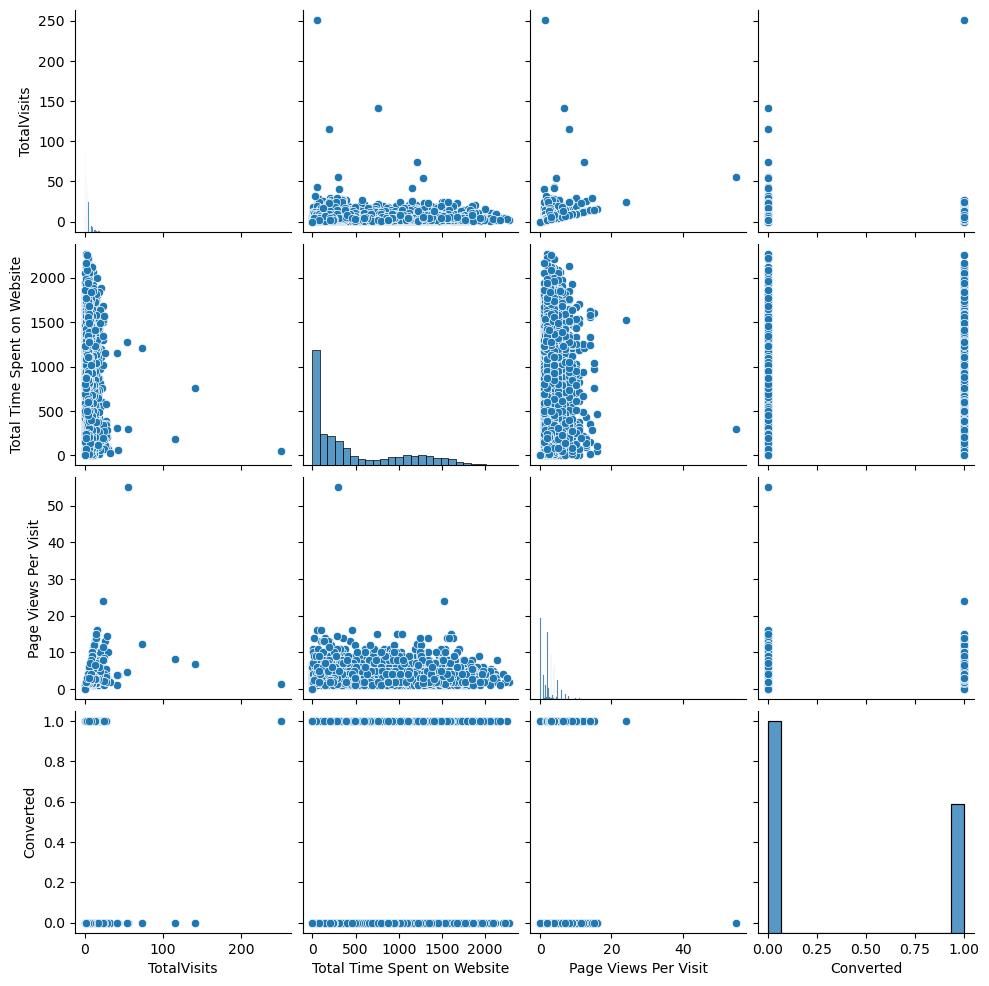

In [172]:
plt.figure()
sns.pairplot(leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']])
plt.show()

Cant see any linear relationship between totalview, total time spent on the website, page per visit

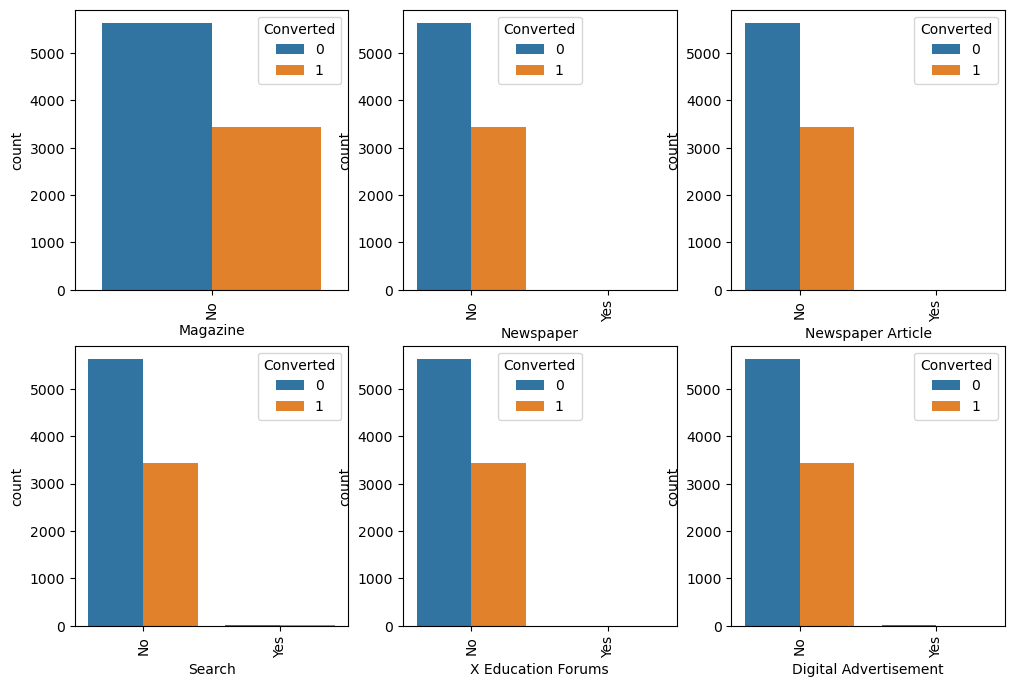

In [173]:
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1)
sns.countplot(x = 'Magazine', hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.countplot(x = 'Newspaper',hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'Newspaper Article',hue='Converted' ,  data = leads )
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Search', hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'X Education Forums',hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'Digital Advertisement',hue='Converted' ,  data = leads )
plt.xticks(rotation=90)
plt.show()

We can See all these mediums are not contributing to conversion rate as all of them have most values as no. We cannot infer much here

In [174]:
#All these add and recommendation column mostly have monotonous values so dropping them
leads.drop(["Search","X Education Forums","Digital Advertisement","Magazine", "Newspaper","Newspaper Article","Through Recommendations"],axis=1, inplace=True)

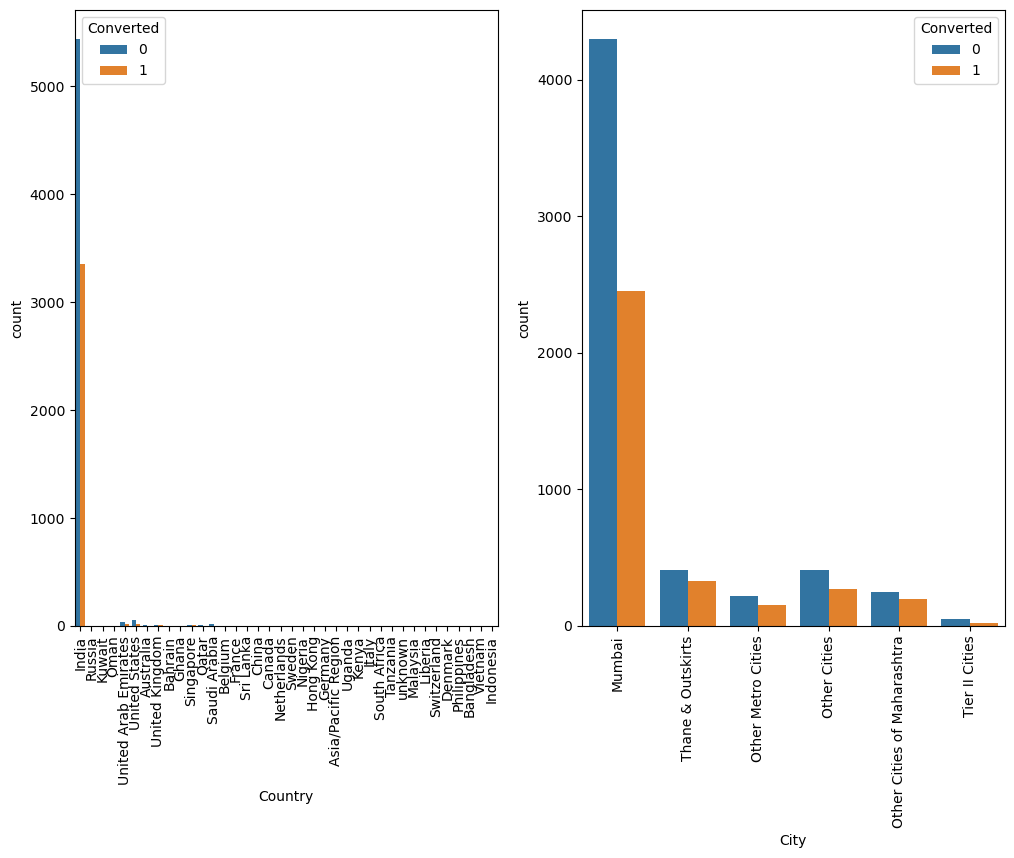

In [175]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.countplot(x = 'Country', hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'City',hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.show()

Most data is available from country India. We can see Mumbai has most lead generated.

In [176]:
#Country and City column not showing any variation. Dropping it.
leads.drop(["Country","City"],axis=1, inplace=True)

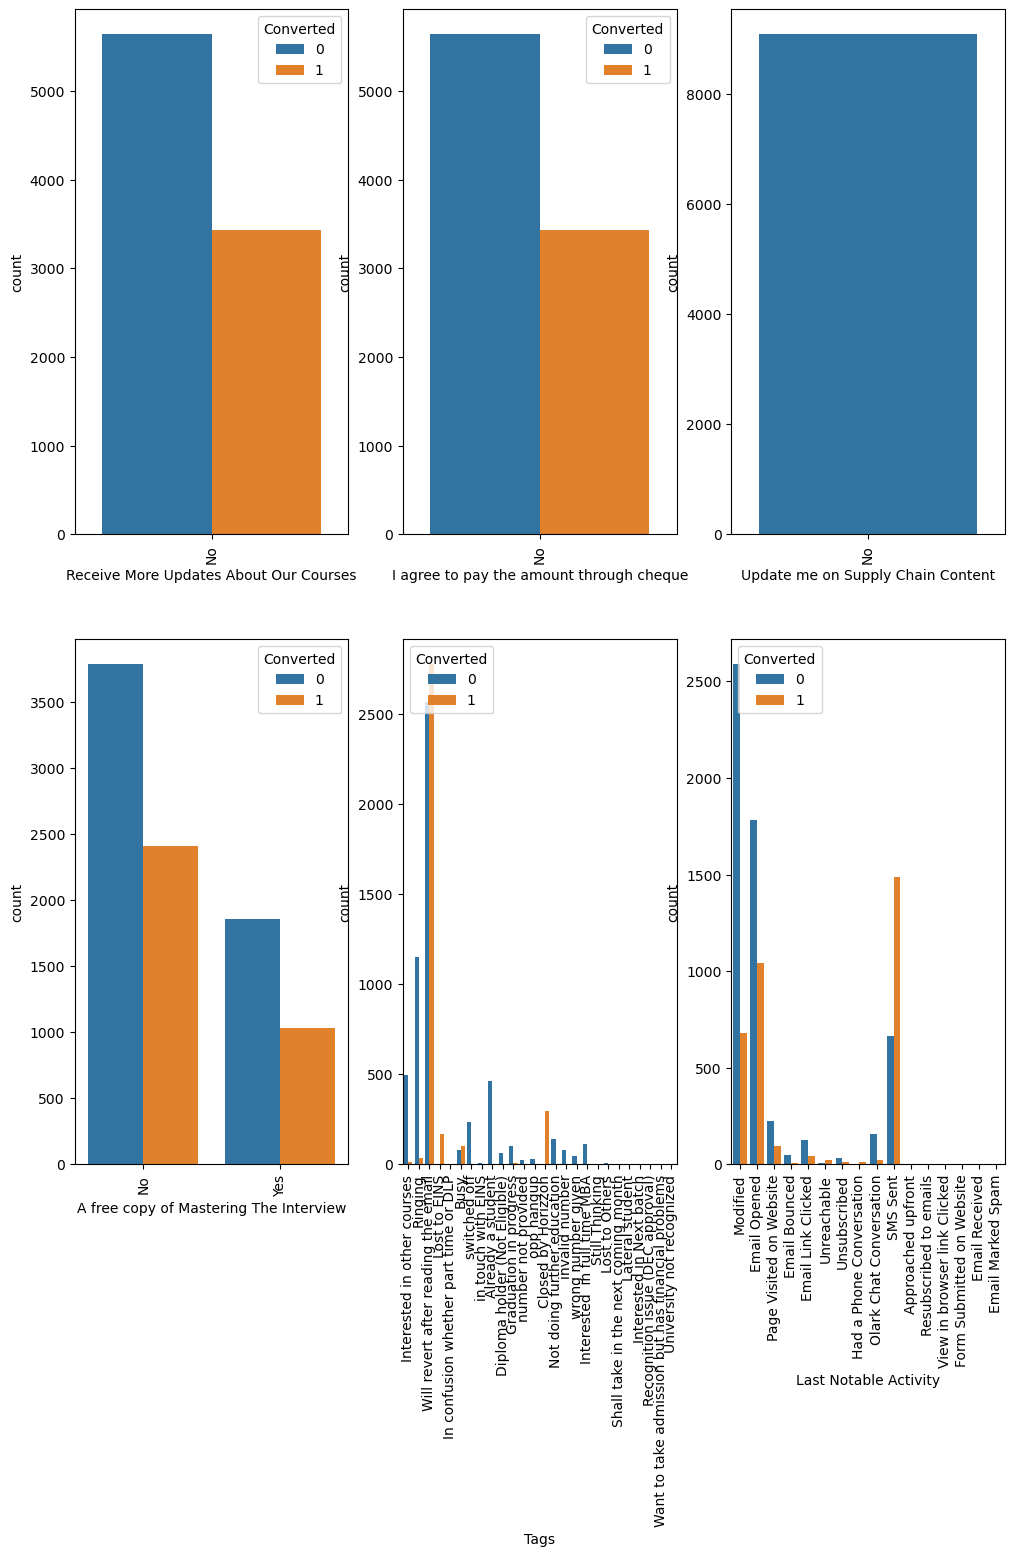

In [177]:
plt.figure(figsize=(12, 15))
plt.subplot(2,3,1)
sns.countplot(x = 'Receive More Updates About Our Courses', hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.countplot(x = 'I agree to pay the amount through cheque',hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'Update me on Supply Chain Content' ,  data = leads )
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'A free copy of Mastering The Interview', hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Tags',hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'Last Notable Activity',hue='Converted' ,  data = leads )
plt.xticks(rotation=90)
plt.show()

Receive more updates about course, agree to pay through check and update on suppy chain content has all no values hence cannot infer anything.

Free copy of mastering inverview we can see no selected has high lead generation.

Last notable activity we can see email, sms and modification and SMS show high conversion rate.

Will revert after reading email tag high lead genartion and conversion rate.

In [178]:
#Receive more updates about course, agree to pay through check and update on suppy chain content have all values no and we cannot infer anything. Tags also has concentratrated population in single category as copare to rest. hence dropping column
leads.drop(["Receive More Updates About Our Courses","I agree to pay the amount through cheque","Update me on Supply Chain Content","Tags"],axis=1, inplace=True)

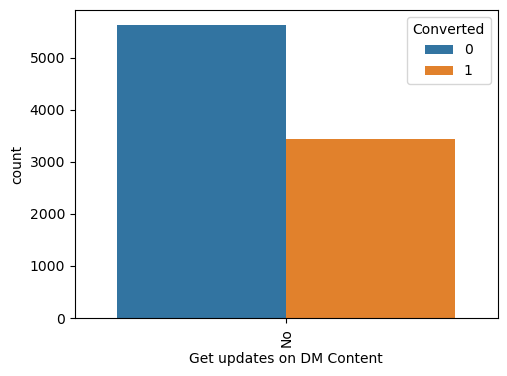

In [179]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.countplot(x = 'Get updates on DM Content', hue='Converted', data = leads)
plt.xticks(rotation=90)
plt.show()

In [180]:
#Get update on DM havs no variation. Dropping it
leads.drop(["Get updates on DM Content"],axis=1, inplace=True)

In [181]:
leads.shape

(9074, 14)

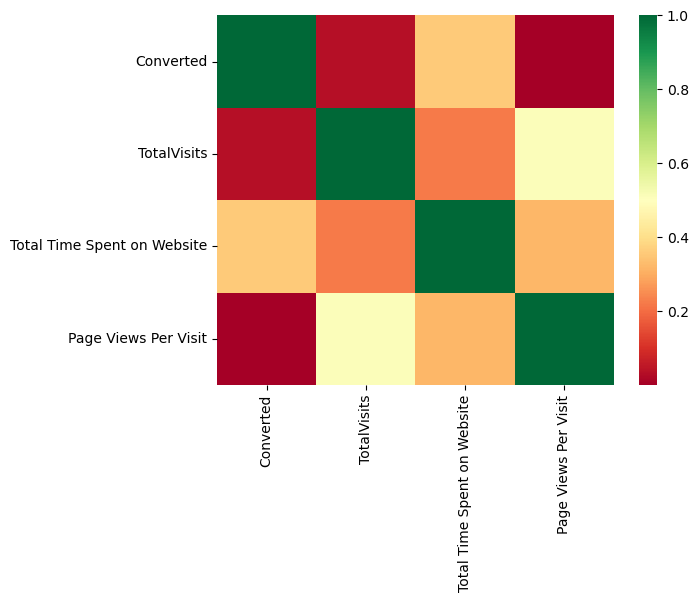

In [182]:
sns.heatmap(leads.corr(), cmap="RdYlGn")
plt.show()

Can see some total visits and Cannot see any strong linear relation between varaibles

# Data Preparation

In [183]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,No,Modified


In [184]:
#Converting Yes/no variables to 1/0 values

# List of variables to map

varlist =  ['Do Not Call', 'Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variables list
leads[varlist] = leads[varlist].apply(binary_map)

In [185]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,0,Modified


In [186]:
#Creating Dummy Variables for categoricle variables

Dummy_vars = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Last Notable Activity']],drop_first=True)

# Check cfeated dummy variable
Dummy_vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [187]:
#add created dummy variables in main dataset

leads= pd.concat([leads,Dummy_vars],axis=1)

In [188]:
#Drop columsn for which dummies are created
leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Last Notable Activity'], axis = 1, inplace = True)

In [189]:
leads.shape

(9074, 85)

In [190]:
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


# Train Test Split

In [191]:
# Putting feature variable to X
X = leads.drop(['Converted','Prospect ID'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [192]:
# Putting target variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [193]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [194]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


# Checking the Convertion Rate


In [195]:
convert = (sum(leads['Converted'])/len(leads['Converted'].index))*100
convert

37.85541106458012

We have convertion rate is 37.86% (~38%)

# Model Building
## Feature selection using RFE

In [196]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [197]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [198]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False, False])

In [199]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 44),
 ('A free copy of Mastering The Interview', False, 42),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 33),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 23),
 ('Lead Source_WeLearn', False, 64),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 59),
 ('Lead Source_blog', False, 24),
 ('Lead Sou

In [200]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

# Assesing Models with statsmodel

In [201]:
import statsmodels.api as sm


#Model 1
X_train_sm = sm.add_constant(X_train[col])
model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.3
Date:                Fri, 11 Aug 2023   Deviance:                       5220.5
Time:                        20:41:13   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7505      0.131     13.363      0.000       1.494       2.007
Do Not Email                                            -1.5499      0.201     -7.728      0.000      -1.943      -1.157
Total Time Spent on Website                              0.9924      0.037     26.503      0.000       0.919       1.066
Lead Origin_Landing Page Submission                     -1.3155      0.127    -10.333      0.000      -1.565      -1.066
Lead Origin_Lead Add Form                                2.6767      0.227     11.774      0.000       2.231       3.122
Lead Source_Direct Traffic                              -0.3613      0.091     -3.950      0.000      -0.541      -0.182
Lead Source_Organic Search                              -0.4014      0.109     -3.691      0.000      -0.614      -0.188
Lead Source_Referral Sites                              -0.7305      0.331     -2.206      0.027      -1.379      -0.081
Lead Source_Welingak Website                             2.6054      0.758      3.437      0.001       1.120       4.091
Last Activity_Converted to Lead                         -1.0874      0.226     -4.819      0.000      -1.530      -0.645
Last Activity_Email Bounced                             -1.1792      0.431     -2.736      0.006      -2.024      -0.335
Last Activity_Had a Phone Conversation                   1.6815      0.783      2.148      0.032       0.147       3.216
Last Activity_Olark Chat Conversation                   -1.1585      0.196     -5.901      0.000      -1.543      -0.774
Specialization_Unknown                                  -1.0362      0.124     -8.381      0.000      -1.278      -0.794
What is your current occupation_Housewife               22.7967   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
What is your current occupation_Working Professional     2.6151      0.194     13.489      0.000       2.235       2.995
Last Notable Activity_Email Link Clicked                -1.7728      0.258     -6.864      0.000      -2.279      -1.267
Last Notable Activity_Email Opened                      -1.4429      0.088    -16.357      0.000      -1.616      -1.270
Last Notable Activity_Modified                          -1.7823      0.100    -17.739      0.000      -1.979      -1.585
Last Notable Activity_Olark Chat Conversation           -1.4551      0.376     -3.875      0.000      -2.191      -0.719
Last Notable Activity_Page Visited on Website           -1.7352      0.199     -8.732      0.000      -2.125      -1.346
========================================================================================================================
"""

# VIF Calculation

In [202]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [203]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.41
17,Last Notable Activity_Modified,2.71
12,Specialization_Unknown,2.15
4,Lead Source_Direct Traffic,2.14
11,Last Activity_Olark Chat Conversation,1.94
0,Do Not Email,1.86
16,Last Notable Activity_Email Opened,1.85
9,Last Activity_Email Bounced,1.76
3,Lead Origin_Lead Add Form,1.54
18,Last Notable Activity_Olark Chat Conversation,1.37


VIF values are below 5.

Checking P value we can see few of them have high P value. Dropping them

In [204]:
# Whats is your current occupation housewife has high p value . Dropping it.
col = col.drop('What is your current occupation_Housewife')

In [205]:
#Model 2
X_train_sm = sm.add_constant(X_train[col])
model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.6
Date:                Fri, 11 Aug 2023   Deviance:                       5229.2
Time:                        20:41:14   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3993
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7503      0.131     13.368      0.000       1.494       2.007
Do Not Email                                            -1.5512      0.201     -7.734      0.000      -1.944      -1.158
Total Time Spent on Website                              0.9916      0.037     26.513      0.000       0.918       1.065
Lead Origin_Landing Page Submission                     -1.3156      0.127    -10.344      0.000      -1.565      -1.066
Lead Origin_Lead Add Form                                2.6930      0.227     11.858      0.000       2.248       3.138
Lead Source_Direct Traffic                              -0.3605      0.091     -3.945      0.000      -0.540      -0.181
Lead Source_Organic Search                              -0.3919      0.108     -3.612      0.000      -0.605      -0.179
Lead Source_Referral Sites                              -0.7291      0.331     -2.203      0.028      -1.378      -0.080
Lead Source_Welingak Website                             2.5910      0.758      3.418      0.001       1.105       4.077
Last Activity_Converted to Lead                         -1.0875      0.226     -4.821      0.000      -1.530      -0.645
Last Activity_Email Bounced                             -1.1779      0.431     -2.734      0.006      -2.022      -0.333
Last Activity_Had a Phone Conversation                   1.6792      0.783      2.145      0.032       0.145       3.214
Last Activity_Olark Chat Conversation                   -1.1563      0.196     -5.890      0.000      -1.541      -0.772
Specialization_Unknown                                  -1.0413      0.124     -8.429      0.000      -1.283      -0.799
What is your current occupation_Working Professional     2.6103      0.194     13.462      0.000       2.230       2.990
Last Notable Activity_Email Link Clicked                -1.7639      0.257     -6.862      0.000      -2.268      -1.260
Last Notable Activity_Email Opened                      -1.4356      0.088    -16.290      0.000      -1.608      -1.263
Last Notable Activity_Modified                          -1.7813      0.100    -17.733      0.000      -1.978      -1.584
Last Notable Activity_Olark Chat Conversation           -1.4536      0.376     -3.871      0.000      -2.190      -0.718
Last Notable Activity_Page Visited on Website           -1.7344      0.199     -8.729      0.000      -2.124      -1.345
========================================================================================================================
"""

In [206]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.41
16,Last Notable Activity_Modified,2.71
12,Specialization_Unknown,2.15
4,Lead Source_Direct Traffic,2.14
11,Last Activity_Olark Chat Conversation,1.94
0,Do Not Email,1.86
15,Last Notable Activity_Email Opened,1.85
9,Last Activity_Email Bounced,1.76
3,Lead Origin_Lead Add Form,1.54
7,Lead Source_Welingak Website,1.37


All VIF are below 5. P values also are smaller.

# Model Evaluation

In [207]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.179402
1012    0.165002
9226    0.124167
4750    0.846013
7987    0.572858
1281    0.793101
2880    0.132977
4971    0.974373
7536    0.795108
1248    0.533758
dtype: float64

In [208]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1794019 , 0.16500243, 0.12416724, 0.84601262, 0.57285766,
       0.79310139, 0.13297712, 0.97437267, 0.79510835, 0.53375757])

### Creating actual conversion vs predicted convertion flag

In [209]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.179402,3009
1,0,0.165002,1012
2,0,0.124167,9226
3,1,0.846013,4750
4,1,0.572858,7987


### Creating new column Predicted =1 where converted prob >0.5 else 0

In [210]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.179402,3009,0
1,0,0.165002,1012,0
2,0,0.124167,9226,0
3,1,0.846013,4750,1
4,1,0.572858,7987,1


In [211]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3465  440]
 [ 798 1648]]


In [212]:
# Predicted     not_converted    converted
# Actual
# not_churn        3465      440
# churn            798       1648  

In [213]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8050700677058731


Accuracy is > 80

In [214]:
#Metric Evaluation
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [215]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6737530662305805

In [216]:
# Let us calculate specificity
TN / float(TN+FP)

0.8873239436619719

In [217]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11267605633802817


In [218]:
# positive predictive value 
print (TP / float(TP+FP))

0.789272030651341


In [219]:
# Negative predictive value
print (TN / float(TN+ FN))

0.812807881773399


Sensitivity of model is low. 

# Plotting ROC curve And finding Optimal Cutoff

In [220]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [221]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

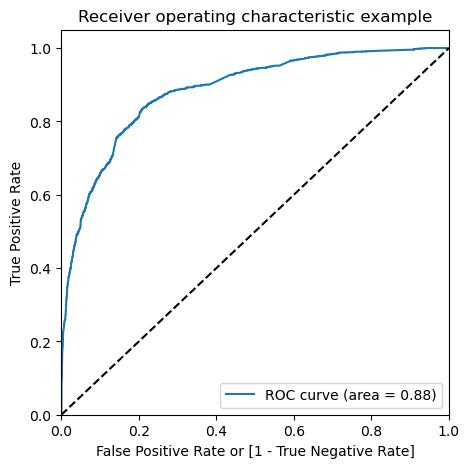

In [222]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Aread under curve is 88%

In [223]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.179402,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.165002,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.124167,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.846013,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.572858,7987,1,1,1,1,1,1,1,0,0,0,0


In [224]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.577389     0.978741     0.325992
0.2   0.2  0.762557     0.888798     0.683483
0.3   0.3  0.798142     0.855274     0.762356
0.4   0.4  0.810266     0.790679     0.822535
0.5   0.5  0.805070     0.673753     0.887324
0.6   0.6  0.802078     0.600164     0.928553
0.7   0.7  0.788065     0.529845     0.949808
0.8   0.8  0.763502     0.432134     0.971063
0.9   0.9  0.715320     0.278823     0.988732


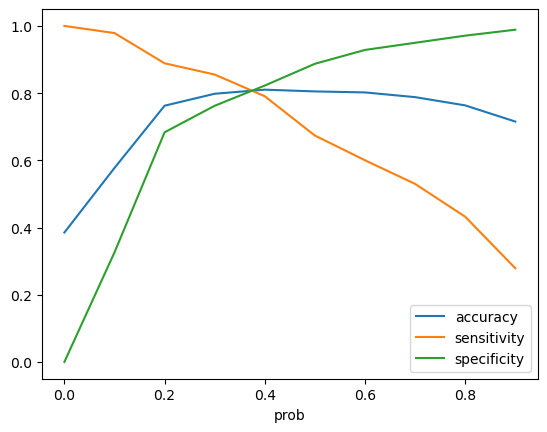

In [225]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [226]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.179402,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.165002,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.124167,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.846013,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.572858,7987,1,1,1,1,1,1,1,0,0,0,0,1


In [227]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8056998897811368

In [228]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3141,  764],
       [ 470, 1976]], dtype=int64)

In [229]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [230]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8078495502861816

In [231]:
# Let us calculate specificity
TN / float(TN+FP)

0.8043533930857875

In [232]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19564660691421254


In [233]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7211678832116788


In [234]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8698421489891996


Accuracy, sencitivity, specificity looks good 

# Precision and Recall

In [235]:
#Checking confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3465,  440],
       [ 798, 1648]], dtype=int64)

In [236]:
#Precison
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.789272030651341

In [237]:
#Recall 
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6737530662305805

In [238]:
#Importing sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [239]:
#Precion score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.789272030651341

In [240]:
#Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6737530662305805

# Precision Recall Tradeoff

In [241]:
from sklearn.metrics import precision_recall_curve

In [242]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [243]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

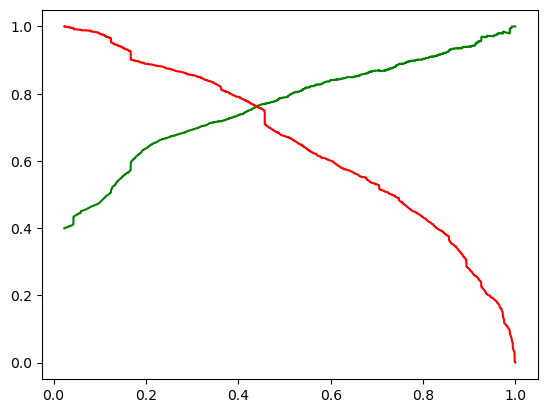

In [244]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making Predictions on test data

## Scaling test data

In [245]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [246]:
# Assigning column selected in final model to test datset
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1.887326,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [247]:
#adding constant in test data
X_test_sm = sm.add_constant(X_test)

# Making prediction on test data

In [248]:
y_test_pred = res.predict(X_test_sm)

In [249]:
y_test_pred[:10]

3271    0.210443
1490    0.957723
7936    0.186447
4216    0.855799
3830    0.121780
1800    0.703999
6507    0.447240
4821    0.268570
4223    0.925586
4714    0.124167
dtype: float64

In [250]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [251]:
# Let's see the head
y_pred_1.head()

,0
3271,0.210443
1490,0.957723
7936,0.186447
4216,0.855799
3830,0.121780


In [252]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [253]:
# Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index

In [254]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [255]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [256]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.210443
1,1,1490,0.957723
2,0,7936,0.186447
3,1,4216,0.855799
4,0,3830,0.121780


In [257]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [258]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [259]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.210443
1,1490,1,0.957723
2,7936,0,0.186447
3,4216,1,0.855799
4,3830,0,0.121780


In [260]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [261]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.210443,0
1,1490,1,0.957723,1
2,7936,0,0.186447,0
3,4216,1,0.855799,1
4,3830,0,0.121780,0


In [262]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.799118619170033

In [263]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1400,  334],
       [ 213,  776]], dtype=int64)

In [264]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [265]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7846309403437816

In [266]:
# Let us calculate specificity
TN / float(TN+FP)

0.8073817762399077

# Assigning lead scores

In [267]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,3271,0,0.210443,0,21
1,1490,1,0.957723,1,96
2,7936,0,0.186447,0,19
3,4216,1,0.855799,1,86
4,3830,0,0.121780,0,12


# Comparing restults from TRain and test data

## Train Data
Accuracy :  80.56%

Sensitivity : 80.78%

Specificity : 80.43%

## Test Data
Accuracy :  79.91%
    
Sentivity : 78.46%
    
Specificity : 80.73%

We can see on both data have ballpark conversion rate around 80

We can use the model to get higher conversion rate of 80%

In [268]:
# Important features in having hig conversion rate
res.params.sort_values()

Last Notable Activity_Modified                         -1.781292
Last Notable Activity_Email Link Clicked               -1.763876
Last Notable Activity_Page Visited on Website          -1.734400
Do Not Email                                           -1.551181
Last Notable Activity_Olark Chat Conversation          -1.453591
Last Notable Activity_Email Opened                     -1.435641
Lead Origin_Landing Page Submission                    -1.315599
Last Activity_Email Bounced                            -1.177896
Last Activity_Olark Chat Conversation                  -1.156318
Last Activity_Converted to Lead                        -1.087473
Specialization_Unknown                                 -1.041328
Lead Source_Referral Sites                             -0.729102
Lead Source_Organic Search                             -0.391886
Lead Source_Direct Traffic                             -0.360524
Total Time Spent on Website                             0.991610
Last Activity_Had a Phone

In [269]:
#Checking hot leads
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1,1490,1,0.957723,1,96
3,4216,1,0.855799,1,86
8,4223,1,0.925586,1,93
16,1946,1,0.869965,1,87
21,2461,1,0.994011,1,99
...,...,...,...,...,...
2694,1566,1,0.951936,1,95
2699,6461,1,0.971451,1,97
2703,5741,1,0.890222,1,89
2715,6299,1,0.881299,1,88


These 439 leads can me contacted for higher conversion rate

These are the hot leads in given dataset as per built model